# Complaint Analysis Project

Project Description:
complaint Analysis : "Analyzing Complaints based on Complaint Types and Regions.

Cleaning and Preprocessing the Complaint Types Data.

To calculate Resolution Time for each Complaints and checking which Agency resolve most complaints.

To check City, Location and Month wise Complaint Types.

Hypothesis testing (Shapiro-Wilk test,Kruskal-Wallis test ).


Implementation of ML algorithm for classification of Complaint Types according to Resolution Time (KNN, Random Forest Classifier) & prediction( linear Regression).

Time series analysis on Complaints and forecasting next 1week ,1 month, Complaints.(Decomposition, Stationarity, Moving Average ,Holt Winters Method, SARIMAX Model).

Evaluation of the models.

# Importing Libraries

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics

# Importing DataSet

In [377]:
data= pd.read_csv(r'E:\Symbi MLE\PROJECT\complaint_analysis\Complaint_Analysis.csv')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [378]:
pd.set_option('display.max_columns', None)

In [379]:
data.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


# Data Summarise.

In [380]:
data.shape

(364558, 53)

In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

# Finding Null Values

In [382]:
null= data.isna().sum()
# null

In [144]:
# for i in dict(null):
#     print(i,'--------->',null[i])


###  Count of Null Values

In [383]:
null_column_count= []

for i in dict(null):
    if dict(null)[i] != 0:
        print(i,'---->',(dict(null)[i]))
        null_column_count.append(dict(null)[i])      

Closed Date ----> 2381
Descriptor ----> 6501
Location Type ----> 133
Incident Zip ----> 2998
Incident Address ----> 51699
Street Name ----> 51699
Cross Street 1 ----> 57188
Cross Street 2 ----> 57805
Intersection Street 1 ----> 313438
Intersection Street 2 ----> 314046
Address Type ----> 3252
City ----> 2997
Landmark ----> 364183
Facility Type ----> 2389
Due Date ----> 3
Resolution Action Updated Date ----> 2402
X Coordinate (State Plane) ----> 4030
Y Coordinate (State Plane) ----> 4030
School Region ----> 1
School Code ----> 1
School Zip ----> 1
School or Citywide Complaint ----> 364558
Vehicle Type ----> 364558
Taxi Company Borough ----> 364558
Taxi Pick Up Location ----> 364558
Bridge Highway Name ----> 364261
Bridge Highway Direction ----> 364261
Road Ramp ----> 364296
Bridge Highway Segment ----> 364296
Garage Lot Name ----> 364558
Ferry Direction ----> 364557
Ferry Terminal Name ----> 364556
Latitude ----> 4030
Longitude ----> 4030
Location ----> 4030


## Interpritation: We have 35 columns here which contains Null value

# Finding Percentage of Null values for ecah column! 

In [384]:
for i in dict(null):
    if dict(null)[i] != 0:
        nul = ((dict(null)[i])/(data.shape[0]))*100
        print('Column Name: ',i,',','Null Count: ',dict(null)[i],',','Null%' ,nul)

Column Name:  Closed Date , Null Count:  2381 , Null% 0.6531196682009447
Column Name:  Descriptor , Null Count:  6501 , Null% 1.7832553393424366
Column Name:  Location Type , Null Count:  133 , Null% 0.036482535015004466
Column Name:  Incident Zip , Null Count:  2998 , Null% 0.8223657140976196
Column Name:  Incident Address , Null Count:  51699 , Null% 14.181282539403881
Column Name:  Street Name , Null Count:  51699 , Null% 14.181282539403881
Column Name:  Cross Street 1 , Null Count:  57188 , Null% 15.686941446902825
Column Name:  Cross Street 2 , Null Count:  57805 , Null% 15.856187492799501
Column Name:  Intersection Street 1 , Null Count:  313438 , Null% 85.97753992505993
Column Name:  Intersection Street 2 , Null Count:  314046 , Null% 86.14431722798567
Column Name:  Address Type , Null Count:  3252 , Null% 0.8920391268330417
Column Name:  City , Null Count:  2997 , Null% 0.8220914093230707
Column Name:  Landmark , Null Count:  364183 , Null% 99.89713570954416
Column Name:  Facil

In [147]:
# [i for i in data.isna().mean()*100 if i!=0]

# Removing columns where Null Values are more than 80%

In [385]:
l=[]
for i in dict(null) :
    if dict(null)[i] != 0:
        nul = ((dict(null)[i])/(data.shape[0]))*100
#         print(nul)
        if nul >80:
            print(i,'---->',nul)
            l.append(i)
            data.drop(columns=i,inplace= True)
            

Intersection Street 1 ----> 85.97753992505993
Intersection Street 2 ----> 86.14431722798567
Landmark ----> 99.89713570954416
School or Citywide Complaint ----> 100.0
Vehicle Type ----> 100.0
Taxi Company Borough ----> 100.0
Taxi Pick Up Location ----> 100.0
Bridge Highway Name ----> 99.91853148195898
Bridge Highway Direction ----> 99.91853148195898
Road Ramp ----> 99.92813214906818
Bridge Highway Segment ----> 99.92813214906818
Garage Lot Name ----> 100.0
Ferry Direction ----> 99.99972569522545
Ferry Terminal Name ----> 99.9994513904509


# There are 14 columns where more than 80% observation are Null

In [386]:
data.shape

(364558, 39)

# Removing Unwanted Columns

In [388]:
# data.columns

In [389]:
# data.head(2)

In [390]:
d_col=['Unique Key','Cross Street 1','Agency','Incident Zip','Cross Street 1','Cross Street 2','Address Type','Facility Type',
  'X Coordinate (State Plane)','Y Coordinate (State Plane)','Park Facility Name','School Name','School Number','School Number',
  'School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found',
  ]

In [391]:
data.drop(d_col,axis=1,inplace=True)

In [392]:
data.head(2)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude,Location
0,12/31/2015 23:59,1/1/2016 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,NEW YORK,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 23:59,1/1/2016 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,ASTORIA,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [393]:
data.shape

(364558, 19)

In [394]:
data.isna().mean()*100

Created Date                       0.000000
Closed Date                        0.653120
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.783255
Location Type                      0.036483
Incident Address                  14.181283
Street Name                       14.181283
City                               0.822091
Status                             0.000000
Due Date                           0.000823
Resolution Description             0.000000
Resolution Action Updated Date     0.658880
Community Board                    0.000000
Borough                            0.000000
Park Borough                       0.000000
Latitude                           1.105448
Longitude                          1.105448
Location                           1.105448
dtype: float64

In [395]:
data.dropna(subset=['Latitude'],axis=0,inplace=True)
# data.isna().sum()

In [396]:
data.shape
data.isna().sum()

Created Date                          0
Closed Date                          58
Agency Name                           0
Complaint Type                        0
Descriptor                         6425
Location Type                       122
Incident Address                  51688
Street Name                       51688
City                                 41
Status                                0
Due Date                              1
Resolution Description                0
Resolution Action Updated Date       80
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                              0
Longitude                             0
Location                              0
dtype: int64

# Replacing null values

In [397]:
data['Closed Date']= data['Closed Date'].fillna(data['Closed Date'].mode()[0])
data.isnull().sum()

Created Date                          0
Closed Date                           0
Agency Name                           0
Complaint Type                        0
Descriptor                         6425
Location Type                       122
Incident Address                  51688
Street Name                       51688
City                                 41
Status                                0
Due Date                              1
Resolution Description                0
Resolution Action Updated Date       80
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                              0
Longitude                             0
Location                              0
dtype: int64

# SimpleImputer

In [398]:
from sklearn.impute import SimpleImputer

In [399]:
imputer = SimpleImputer(strategy='most_frequent')

In [400]:
data1 = imputer.fit_transform(data)


In [401]:
data=pd.DataFrame(data1,columns=data.columns)

In [402]:
data.isna().sum()

Created Date                      0
Closed Date                       0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Address                  0
Street Name                       0
City                              0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
Park Borough                      0
Latitude                          0
Longitude                         0
Location                          0
dtype: int64

### City Wise Complaint Type

In [405]:
city_complaint_type=data.groupby(['City','Complaint Type'])

In [409]:
city_complaint_type.sum().head(5)

Created Date  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      12/22/2015 20:2612/22/2015 12:4712/16/2015 17:...   
        Blocked Driveway  12/17/2015 21:3512/13/2015 3:0712/7/2015 18:40...   
        Derelict Vehicle  12/17/2015 11:3012/17/2015 7:1712/16/2015 7:22...   
        Disorderly Youth                     8/18/2015 18:116/21/2015 22:07   
        Drinking                                            4/26/2015 20:15   

                                                                Closed Date  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      12/22/2015 22:0212/22/2015 14:2412/16/2015 20:...   
        Blocked Driveway  12/18/2015 0:0912/13/2015 3:5412/7/2015 20:271...   
        Derelict Vehicle  12/17/2015 18:1212/17/2015 13:4512/16/2015 12:...   
        Disorderly Youth                      8/18/2015 21:486/22/2015 1:41   
        Drinking                                            4/26/2015 20:30   

                                                                Agency Name  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      New York City Police DepartmentNew York City P...   
        Blocked Driveway  New York City Police DepartmentNew York City P...   
        Derelict Vehicle  New York City Police DepartmentNew York City P...   
        Disorderly Youth  New York City Police DepartmentNew York City P...   
        Drinking                            New York City Police Department   

                                                                 Descriptor  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      NeglectedNeglectedChainedOther (complaint deta...   
        Blocked Driveway  No AccessNo AccessNo AccessNo AccessNo AccessN...   
        Derelict Vehicle  With License PlateWith License PlateWith Licen...   
        Disorderly Youth  Playing in Unsuitable PlacePlaying in Unsuitab...   
        Drinking                                    Underage - Licensed Est   

                                                              Location Type  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      Residential Building/HouseResidential Building...   
        Blocked Driveway  Street/SidewalkStreet/SidewalkStreet/SidewalkS...   
        Derelict Vehicle  Street/SidewalkStreet/SidewalkStreet/SidewalkS...   
        Disorderly Youth                     Street/SidewalkStreet/Sidewalk   
        Drinking                                        Club/Bar/Restaurant   

                                                           Incident Address  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      69-54 DECOSTA AVENUE57-15 SHOREFRONT PARKWAY69...   
        Blocked Driveway  173 BEACH 59 STREET69-44 ALMEDA AVENUE308 BEAC...   
        Derelict Vehicle  64-03 THURSBY AVENUELARKIN AVENUE64-03 THURSBY...   
        Disorderly Youth               54-17 ALMEDA AVENUE1207 BEACH AVENUE   
        Drinking                                          1207 BEACH AVENUE   

                                                                Street Name  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      DECOSTA AVENUESHOREFRONT PARKWAYDECOSTA AVENUE...   
        Blocked Driveway  BEACH 59 STREETALMEDA AVENUEBEACH 70 STREETBEA...   
        Derelict Vehicle  THURSBY AVENUELARKIN AVENUETHURSBY AVENUEBEACH...   
        Disorderly Youth                              ALMEDA AVENUEBROADWAY   
        Drinking                                                   BROADWAY   

                                                                     Status  \
City    Complaint Type                                                        
ARVERNE Animal Abuse      C

<AxesSubplot:xlabel='City,Complaint Type'>

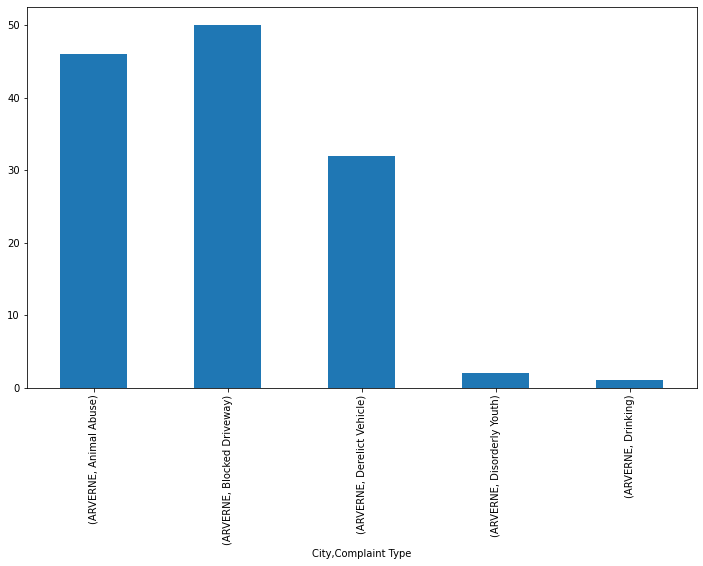

In [408]:
city_complaint_type.size().head(5).plot(kind='bar')

##  Complaints with major reasons

In [410]:
data.groupby(['City','Complaint Type','Descriptor']).size()

City      Complaint Type           Descriptor                    
ARVERNE   Animal Abuse             Chained                            3
                                   Neglected                         17
                                   No Shelter                         1
                                   Other (complaint details)         14
                                   Tortured                          11
                                                                     ..
Woodside  Illegal Parking          Double Parked Blocking Traffic    13
                                   Posted Parking Sign Violation     44
          Noise - Commercial       Car/Truck Horn                     2
          Noise - Street/Sidewalk  Loud Music/Party                   1
                                   Loud Talking                       4
Length: 1982, dtype: int64

In [411]:
df_Blocked_Driveway=data[data['Complaint Type']=='Blocked Driveway'][['City','Complaint Type','Descriptor']]
df_Blocked_Driveway

,City,Complaint Type,Descriptor
1,ASTORIA,Blocked Driveway,No Access
2,BRONX,Blocked Driveway,No Access
7,BRONX,Blocked Driveway,No Access
9,BROOKLYN,Blocked Driveway,No Access
10,JACKSON HEIGHTS,Blocked Driveway,No Access
...,...,...,...
360518,BRONX,Blocked Driveway,No Access
360519,CORONA,Blocked Driveway,No Access
360520,BRONX,Blocked Driveway,No Access
360526,BRONX,Blocked Driveway,No Access


In [412]:
df_Blocked_Driveway.value_counts().head(5) # Top 5 cities Blocked driveway cities

City      Complaint Type    Descriptor    
BROOKLYN  Blocked Driveway  No Access         28078
BRONX     Blocked Driveway  No Access         13375
BROOKLYN  Blocked Driveway  Partial Access     8356
BRONX     Blocked Driveway  Partial Access     3678
CORONA    Blocked Driveway  No Access          2973
dtype: int64

<AxesSubplot:title={'center':'Top 5 cities of Blocked driveway'}, xlabel='City,Complaint Type,Descriptor'>

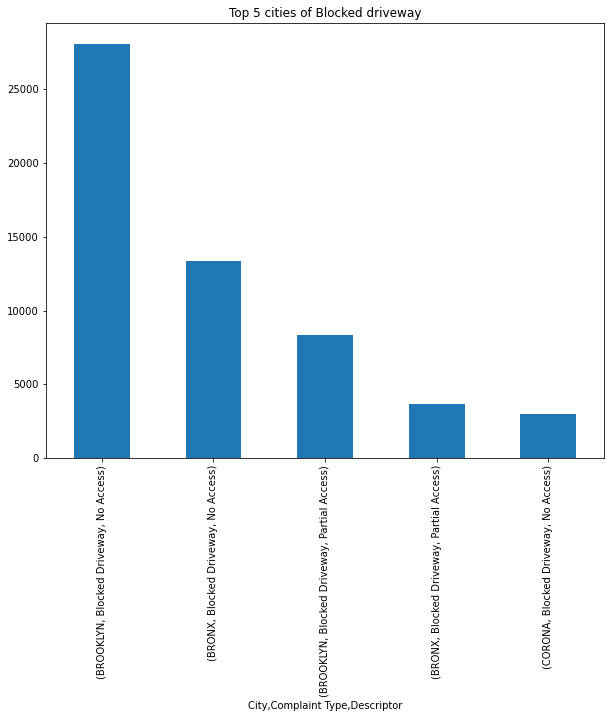

In [213]:
df_Blocked_Driveway.value_counts().head(5).plot(kind='bar',figsize=(10,8),title='Top 5 cities of Blocked driveway')

##########################################################################################################

In [413]:
complaint_type=data['Complaint Type'].value_counts()
for i in dict(complaint_type):
#     print(i,'---------->',complaint_type[i])
    ctype=((dict(complaint_type)[i])/(data.shape[0]))*100
    print('column_Name','------->',i,'-------->',ctype)

column_Name -------> Blocked Driveway --------> 27.87661429902809
column_Name -------> Illegal Parking --------> 25.269327208982382
column_Name -------> Noise - Street/Sidewalk --------> 14.100707850707849
column_Name -------> Noise - Commercial --------> 12.108629565526117
column_Name -------> Derelict Vehicle --------> 5.94461456530422
column_Name -------> Noise - Vehicle --------> 5.305274486308969
column_Name -------> Animal Abuse --------> 2.9132272666755425
column_Name -------> Traffic --------> 1.4340078995251409
column_Name -------> Homeless Encampment --------> 1.3397017707362535
column_Name -------> Vending --------> 1.1552500776638708
column_Name -------> Noise - Park --------> 1.1083743842364533
column_Name -------> Drinking --------> 0.3883193538365952
column_Name -------> Noise - House of Worship --------> 0.29429059601473395
column_Name -------> Posting Advertisement --------> 0.18861225757777483
column_Name -------> Urinating in Public --------> 0.17779478986375538
colu

<AxesSubplot:title={'center':'Value count'}>

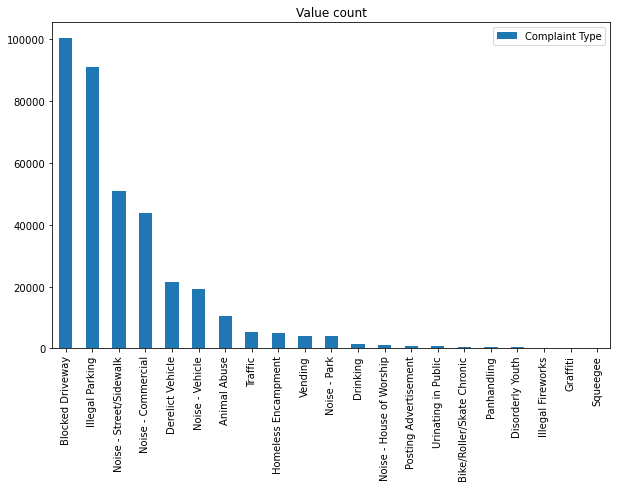

In [414]:
complaint_type.plot(kind='bar',figsize=(10,6),title='Value count',legend='location')

<AxesSubplot:title={'center':'Value count'}>

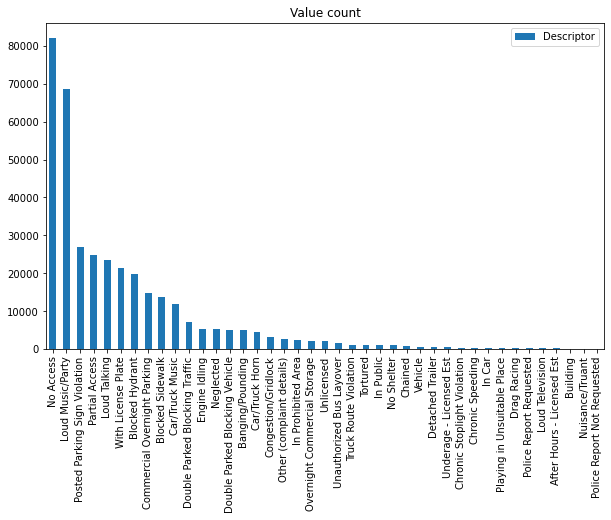

In [415]:
# data['Descriptor'].value_counts()
data['Descriptor'].value_counts().plot(kind='bar',figsize=(10,6),title='Value count',legend='location')

<AxesSubplot:title={'center':'Value count'}>

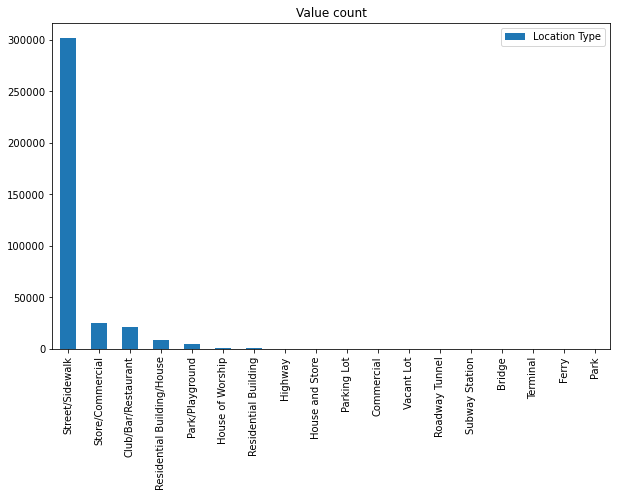

In [57]:
data['Location Type'].value_counts().plot(kind='bar',figsize=(10,6),title='Value count',legend='location')

In [416]:
data.head(3)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude,Location
0,12/31/2015 23:59,1/1/2016 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,NEW YORK,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 0:55,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 23:59,1/1/2016 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,ASTORIA,Closed,1/1/2016 7:59,The Police Department responded to the complai...,1/1/2016 1:26,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 23:59,1/1/2016 4:51,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,BRONX,Closed,1/1/2016 7:59,The Police Department responded and upon arriv...,1/1/2016 4:51,07 BRONX,BRONX,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


# converting into date format

In [417]:
data['Created Date'] =pd.to_datetime(data['Created Date'])
data['Closed Date'] =pd.to_datetime(data['Closed Date'] )
data['Due Date'] =pd.to_datetime(data['Due Date'])
data['Resolution Action Updated Date'] =pd.to_datetime(data['Resolution Action Updated Date']) 

### Created 2 new variables namely "Call_closing_time" & "Resolution_time" for further analysis

In [418]:
data['Call_closing_time'] =  (data['Closed Date'] - data['Created Date']).dt.seconds/3600
data['Resolution_time'] =  (data['Resolution Action Updated Date'] - data['Created Date']).dt.seconds/3600

In [419]:
data.head(2)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude,Location,Call_closing_time,Resolution_time
0,2015-12-31 23:59:00,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,NEW YORK,Closed,2016-01-01 07:59:00,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.933333,0.933333
1,2015-12-31 23:59:00,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,ASTORIA,Closed,2016-01-01 07:59:00,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.450000,1.450000


# Creating New dataset for further analysis

In [420]:
data_set=data.loc[:,['City','Agency Name','Complaint Type','Descriptor','Location Type',
                    'Status','Call_closing_time',
                    'Resolution_time']].copy()

In [422]:
data_set.head(5)

,City,Agency Name,Complaint Type,Descriptor,Location Type,Status,Call_closing_time,Resolution_time
0,NEW YORK,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,Closed,0.933333,0.933333
1,ASTORIA,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,Closed,1.450000,1.450000
2,BRONX,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,Closed,4.866667,4.866667
3,BRONX,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,Closed,7.766667,7.766667
4,ELMHURST,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,Closed,3.466667,3.466667


# Label Encoder

In [424]:
data_set.columns


Index(['City', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Status', 'Call_closing_time', 'Resolution_time'],
      dtype='object')

In [425]:
from sklearn.preprocessing import LabelEncoder

In [426]:
lbe= LabelEncoder()

In [427]:
data_set['Agency Name']=lbe.fit_transform(data_set['Agency Name'])
data_set['Complaint Type']=lbe.fit_transform(data_set['Complaint Type'])
data_set['Location Type']=lbe.fit_transform(data_set['Location Type'])
data_set['Descriptor']=lbe.fit_transform(data_set['Descriptor'])
data_set['City']=lbe.fit_transform(data_set['City'])
data_set['Status']=lbe.fit_transform(data_set['Status'])

In [428]:
data_set

,City,Agency Name,Complaint Type,Descriptor,Location Type,Status,Call_closing_time,Resolution_time
0,33,1,13,20,12,1,0.933333,0.933333
1,1,1,2,24,12,1,1.450000,1.450000
2,6,1,2,24,12,1,4.866667,4.866667
3,6,1,9,10,12,1,7.766667,7.766667
4,13,1,9,3,12,1,3.466667,3.466667
...,...,...,...,...,...,...,...,...
360523,50,1,9,2,12,1,10.300000,10.300000
360524,6,1,14,5,12,1,2.350000,2.350000
360525,33,1,13,20,12,1,0.316667,0.316667
360526,6,1,2,24,12,1,2.683333,2.683333


# checking for the outlier's

<AxesSubplot:>

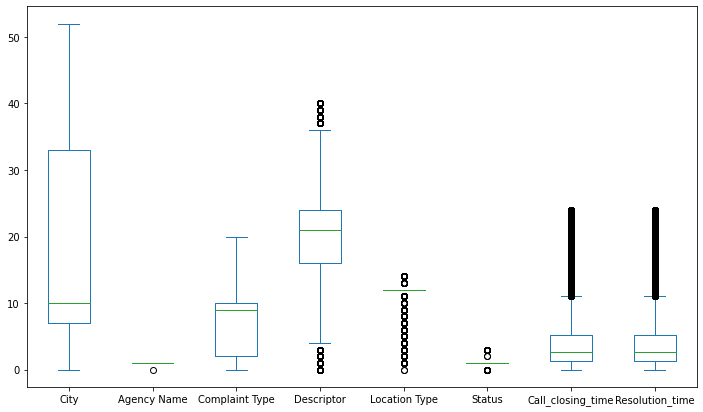

In [429]:
data_set.plot(kind='box')

In [430]:
#using IQR
Q1=data_set.quantile(0.25)
Q3=data_set.quantile(0.75)
IQR=Q3-Q1
IQR

City                 26.000000
Agency Name           0.000000
Complaint Type        8.000000
Descriptor            8.000000
Location Type         0.000000
Status                0.000000
Call_closing_time     3.916667
Resolution_time       3.916667
dtype: float64

In [431]:
#defining upper and lower bound of the quartiles

lower_bound=(Q1-1.5*IQR)
upper_bound=(Q3+1.5*IQR)
print(lower_bound)
print(upper_bound)

City                -32.000
Agency Name           1.000
Complaint Type      -10.000
Descriptor            4.000
Location Type        12.000
Status                1.000
Call_closing_time    -4.625
Resolution_time      -4.625
dtype: float64
City                 72.000000
Agency Name           1.000000
Complaint Type       22.000000
Descriptor           36.000000
Location Type        12.000000
Status                1.000000
Call_closing_time    11.041667
Resolution_time      11.041667
dtype: float64


In [432]:
outliers=data_set[(data_set < lower_bound)|(data_set >upper_bound)]


In [436]:
print(outliers['Agency Name'].nunique())
print(outliers['Complaint Type'].nunique())
print(outliers['Descriptor'].nunique())
print(outliers['Location Type'].nunique())
print(outliers['Status'].nunique())
print(outliers['Call_closing_time'].nunique())
print(outliers['Resolution_time'].nunique())


1
0
8
14
3
777
777


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


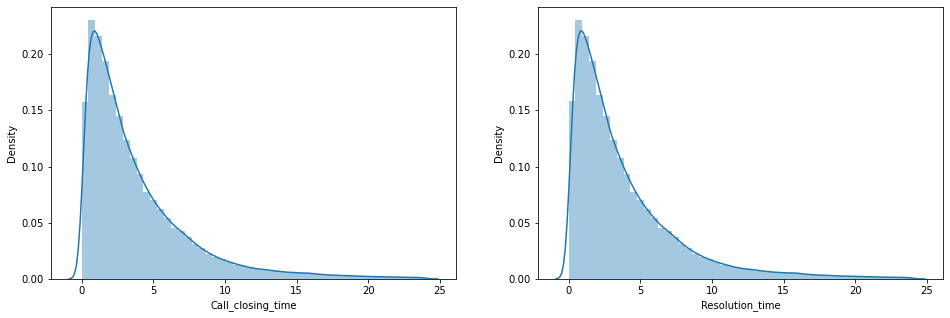

In [441]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data_set['Call_closing_time'])

plt.subplot(1,2,2)
sns.distplot(data_set['Resolution_time'])

plt.show()

In [447]:
data_set['Call_closing_time'].skew()


1.9934071218011753

We can see here data is skewed so we cant use Zscore technique here

Hence we will ise here IQR technique

In [475]:
data_set['Call_closing_time'].describe()

count    360528.000000
mean          3.855724
std           3.781088
min           0.000000
25%           1.250000
50%           2.650000
75%           5.166667
max          23.983333
Name: Call_closing_time, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Call_closing_time'>

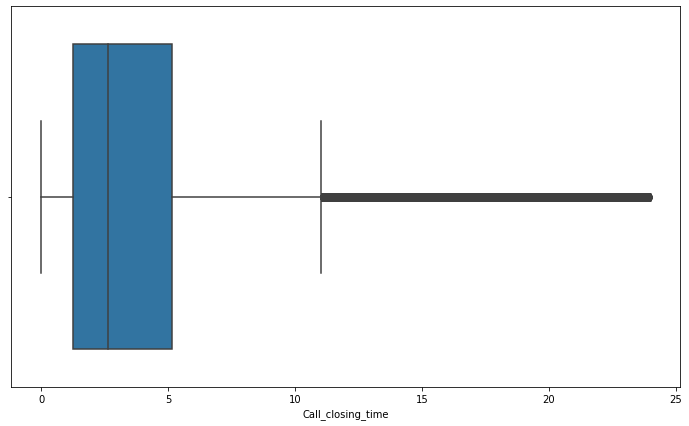

In [476]:
sns.boxplot(data_set['Call_closing_time'])

In [477]:
# Finding the IQR
percentile25 = data_set['Call_closing_time'].quantile(0.25)
percentile75 = data_set['Call_closing_time'].quantile(0.75)

In [478]:
percentile75  # we check this value with above described percentile

5.166666666666667

In [479]:
iqr = percentile75 - percentile25
iqr 

3.916666666666667

In [480]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [481]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11.041666666666668
Lower limit -4.625


# Finding Outliers

In [468]:
data_set[data_set['Call_closing_time'] > upper_limit]

,City,Agency Name,Complaint Type,Descriptor,Location Type,Status,Call_closing_time,Resolution_time
11,6,1,2,24,12,1,11.133333,11.133333
15,38,1,2,29,12,1,15.550000,15.550000
24,6,1,2,24,12,1,16.850000,16.850000
61,33,1,2,24,12,1,16.900000,16.900000
183,6,1,2,24,12,1,11.750000,11.750000
...,...,...,...,...,...,...,...,...
360400,6,1,2,24,12,1,12.450000,12.450000
360402,28,1,2,24,12,1,12.216667,12.216667
360451,37,1,2,24,12,1,16.166667,16.166667
360481,6,1,2,24,12,1,15.333333,15.333333


# Capping

In [482]:
new_df_cap =data_set.copy()

new_df_cap['Call_closing_time'] = np.where(
    new_df_cap['Call_closing_time'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Call_closing_time'] < lower_limit,
        lower_limit,
        new_df_cap['Call_closing_time']
    )
)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Call_closing_time'>

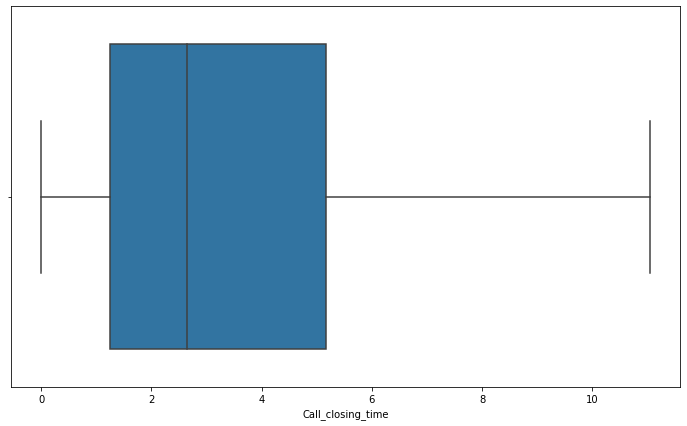

In [483]:
sns.boxplot(new_df_cap['Call_closing_time'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Descriptor'>

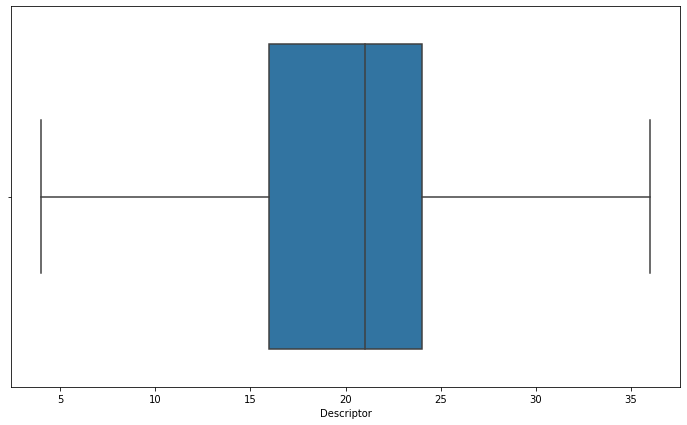

In [484]:
# Finding the IQR
percentile25 = data_set['Descriptor'].quantile(0.25)
percentile75 = data_set['Descriptor'].quantile(0.75)
iqr = percentile75 - percentile25
iqr 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data_set[data_set['Descriptor'] > upper_limit]



new_df_cap['Descriptor'] = np.where(
    new_df_cap['Descriptor'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Descriptor'] < lower_limit,
        lower_limit,
        new_df_cap['Descriptor']
    )
)

sns.boxplot(new_df_cap['Descriptor'])

In [501]:
new_df_cap['Resolution_time']=data_set['Resolution_time']

In [502]:
new_df_cap

,City,Agency Name,Complaint Type,Descriptor,Location Type,Status,Call_closing_time,Resolution_time
0,33,1,13,20.0,12.0,1,0.933333,0.933333
1,1,1,2,24.0,12.0,1,1.450000,1.450000
2,6,1,2,24.0,12.0,1,4.866667,4.866667
3,6,1,9,10.0,12.0,1,7.766667,7.766667
4,13,1,9,4.0,12.0,1,3.466667,3.466667
...,...,...,...,...,...,...,...,...
360523,50,1,9,4.0,12.0,1,10.300000,10.300000
360524,6,1,14,5.0,12.0,1,2.350000,2.350000
360525,33,1,13,20.0,12.0,1,0.316667,0.316667
360526,6,1,2,24.0,12.0,1,2.683333,2.683333


In [503]:
new_df_cap["Time_bucket"]= np.where(new_df_cap["Resolution_time"]<1,0,
                                 np.where(new_df_cap["Resolution_time"]<4,1,
                                 np.where(new_df_cap["Resolution_time"]<8,2,
                                 np.where(new_df_cap["Resolution_time"]<12,3,
                                 np.where(new_df_cap["Resolution_time"]<16,4,
                                 np.where(new_df_cap["Resolution_time"]<20,5,
                                 np.where(new_df_cap["Resolution_time"]<24,6,7)))))))

In [504]:
new_df_cap

,City,Agency Name,Complaint Type,Descriptor,Location Type,Status,Call_closing_time,Resolution_time,Time_bucket
0,33,1,13,20.0,12.0,1,0.933333,0.933333,0
1,1,1,2,24.0,12.0,1,1.450000,1.450000,1
2,6,1,2,24.0,12.0,1,4.866667,4.866667,2
3,6,1,9,10.0,12.0,1,7.766667,7.766667,2
4,13,1,9,4.0,12.0,1,3.466667,3.466667,1
...,...,...,...,...,...,...,...,...,...
360523,50,1,9,4.0,12.0,1,10.300000,10.300000,3
360524,6,1,14,5.0,12.0,1,2.350000,2.350000,1
360525,33,1,13,20.0,12.0,1,0.316667,0.316667,0
360526,6,1,2,24.0,12.0,1,2.683333,2.683333,1


In [506]:
new_df_cap["Time_bucket"].describe()

count    360528.000000
mean          1.338792
std           1.094384
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: Time_bucket, dtype: float64

# Segregating data into X and Y

In [514]:
X=new_df_cap.iloc[:,:-1]
y=new_df_cap.iloc[:,-1]

In [517]:
# X

In [518]:
from sklearn.model_selection import train_test_split

In [519]:
xtrain,xtest,ytrain,ytest =train_test_split(X,y,test_size=0.3,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(252369, 8)
(252369,)
(108159, 8)
(108159,)


# Scaling data

In [520]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(xtrain)
x_test=scaler.fit_transform(xtest)


In [522]:
x_test

array([[ 0.89868775,  0.00304068,  1.10671979, ..., -0.00904738,
         1.68298448,  1.29578752],
       [-0.8402087 ,  0.00304068,  1.10671979, ..., -0.00904738,
         2.43576428,  2.77944525],
       [-0.8402087 ,  0.00304068, -1.17436733, ..., -0.00904738,
        -0.82993136, -0.73099491],
       ...,
       [-0.90708933,  0.00304068,  0.27723356, ..., -0.00904738,
        -0.59999135, -0.5455377 ],
       [-0.90708933,  0.00304068, -1.17436733, ..., -0.00904738,
         2.14833927,  1.6711176 ],
       [-0.8402087 ,  0.00304068, -1.17436733, ..., -0.00904738,
         1.69393401,  1.30461881]])

In [521]:
x_train

array([[-0.83347506,  0.        , -1.17167862, ..., -0.00656132,
        -1.08294606, -0.93439646],
       [-0.90049166,  0.        , -1.17167862, ..., -0.00656132,
         0.19558798,  0.09574465],
       [-0.83347506,  0.        , -1.17167862, ..., -0.00656132,
        -1.02830785, -0.89037333],
       ...,
       [-0.83347506,  0.        ,  1.1099486 , ..., -0.00656132,
        -1.02830785, -0.89037333],
       [-0.43137545,  0.        , -1.17167862, ..., -0.00656132,
         1.20093098,  0.90577013],
       [-0.69944186,  0.        ,  1.1099486 , ..., -0.00656132,
        -1.02830785, -0.89037333]])

# Model bulding knn

In [523]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [524]:
model_1 = KNeighborsClassifier()

In [525]:
model_1= model_1.fit(x_train,ytrain)

In [527]:
y_predict= model_1.predict(x_test)

In [528]:
accuracy=accuracy_score(y_predict,ytest)

In [529]:
accuracy

0.9906896328553334

# KNN model giving us 99% accuracy

# model_2 RandomForestClassifier

In [530]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=42)

In [531]:
model2=model2.fit(x_train,ytrain)

In [532]:
y_predict2= model2.predict(x_test)

In [539]:
accuracy2=accuracy_score(y_predict2,ytest)
accuracy2
print("model_2 accuracy:", accuracy2* 100)

model_2 accuracy: 99.56083173845911


# RandomForestClassifier also giving us 99% accuracy

In [538]:
conf_mat = confusion_matrix(ytest, y_predict2)
conf_mat

array([[20853,     0,     0,     0,     0,     0,     0],
       [  407, 49646,     0,     0,     0,     0,     0],
       [    0,     0, 24677,     0,     0,     0,     0],
       [    0,     0,     0,  7565,    29,     0,     0],
       [    0,     0,     1,     0,  2887,    25,     0],
       [    0,     0,     0,     0,     1,  1367,    10],
       [    0,     0,     0,     0,     0,     2,   689]], dtype=int64)

In [540]:
print(classification_report(y_predict2,ytest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21260
           1       0.99      1.00      1.00     49646
           2       1.00      1.00      1.00     24678
           3       1.00      1.00      1.00      7565
           4       0.99      0.99      0.99      2917
           5       0.99      0.98      0.99      1394
           6       1.00      0.99      0.99       699

    accuracy                           1.00    108159
   macro avg       1.00      0.99      0.99    108159
weighted avg       1.00      1.00      1.00    108159



In [541]:
from sklearn.metrics import r2_score

In [545]:
print('R2 value: ',r2_score(y_predict2,ytest))

R2 value:  0.9963230789288124


# model_3 LR

In [546]:
from sklearn.linear_model import LogisticRegression

In [547]:
model3= LogisticRegression()

In [548]:
model3= model3.fit(x_train,ytrain)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [550]:
y_pred3=model3.predict(x_test)

In [551]:
accuracy_score(y_pred3,ytest)

0.994027311643044

          ####################################### Part two ###############################################

# Statistical Technics

# Shapiro-Wilk test for  Normality Test

Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not.

Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics. The null hypothesis of Shapiro’s 

test is that the population is distributed normally.

In [557]:
from scipy.stats import shapiro

## This is a hypotheses test and the two hypotheses are as follows:

## Ho(Accepted): Sample is from the normal distributions.(Pval>0.05)
## Ha(Rejected): Sample is not from the normal distributions.

In [563]:
ShapiroResult=shapiro(data_set['Call_closing_time'])

In [568]:
if ShapiroResult[1] < 0.05:
    print('WE Reject Ho here, data is not normal')
else:
    print('WE Accept Ho here, data is normal')


WE Reject Ho here, data is not normal


In [571]:
ShapiroResult1=shapiro(data_set['Complaint Type'])

In [572]:
if ShapiroResult1[1] < 0.05:
    print('WE Reject Ho here, data is not normal')
else:
    print('WE Accept Ho here, data is normal')

WE Reject Ho here, data is not normal


our data is non normal so we will use some non parametric test

# Kruskal-Wallis test 

Kruskal-Wallis test is a non-parametric test and an alternative to One-Way Anova. 

By parametric we mean, the data is not assumed to become from a particular distribution.

The main objective of this test is used to determine whether there is a statistical difference between 

the medians of at least three independent groups. 

# To check complaint type and Resolutin time is same or not

## Hypothesis:
### The Kruskal-Wallis Test has the null and alternative hypotheses as discussed below:

### The null hypothesis (H0): The median is the same for all the data groups.
### The alternative hypothesis: (Ha): The median is not equal for all the data groups

In [638]:
data['Complaint Type'].value_counts().head(5)

Blocked Driveway           100503
Illegal Parking             91103
Noise - Street/Sidewalk     50837
Noise - Commercial          43655
Derelict Vehicle            21432
Name: Complaint Type, dtype: int64

In [639]:
data_set['Complaint Type'].value_counts().head(5)

2     100503
9      91103
13     50837
10     43655
3      21432
Name: Complaint Type, dtype: int64

In [640]:
Blocked_Driveway=data_set[data_set['Complaint Type']==2]['Resolution_time']
print(Blocked_Driveway.median())

Illegal_Parking=data_set[data_set['Complaint Type']==9]['Resolution_time']
print(Illegal_Parking.median())
Noise_Street_Sidewalk=data_set[data_set['Complaint Type']==13]['Resolution_time']
print(Noise_Street_Sidewalk.median())

Noise_Commercial=data_set[data_set['Complaint Type']==10]['Resolution_time']
print(Noise_Commercial.median())

Derelict_Vehicle=data_set[data_set['Complaint Type']==3]['Resolution_time']
print(Derelict_Vehicle.median())

3.0166666666666666
2.8333333333333335
2.15
2.0166666666666666
3.816666666666667


In [641]:
from scipy.stats import kruskal

In [648]:

result = kruskal(Blocked_Driveway,Illegal_Parking,Noise_Street_Sidewalk,Noise_Commercial,Derelict_Vehicle)
  
# Print the result
print(result)

KruskalResult(statistic=9429.22664580516, pvalue=0.0)


In [643]:
if result[1] < 0.05:
    print('WE Reject Ho here')
else:
    print('WE Accept H1 here')

WE Reject Ho here


### Interpritation: We can clearly see that Ho is Rejected here.
### we can conclude that there is significant difference median.

# To check Location Type and Resolutin time is same or not


In [630]:
data_set['Location Type'].value_counts().head(5)

12    298100
11     24947
1      21338
9       8850
6       4744
Name: Location Type, dtype: int64

In [631]:
data['Location Type'].value_counts().head(5)

Street/Sidewalk               298100
Store/Commercial               24947
Club/Bar/Restaurant            21338
Residential Building/House      8850
Park/Playground                 4744
Name: Location Type, dtype: int64

In [632]:
Street_Sidewalk=data_set[data_set['Location Type']==12]['Resolution_time']
print(Street_Sidewalk.median())

Store_Commercial=data_set[data_set['Location Type']==11]['Resolution_time']
print(Store_Commercial.median())

Club_Bar_Restaurant=data_set[data_set['Location Type']==1]['Resolution_time']
print(Club_Bar_Restaurant.median())

Residential_Building=data_set[data_set['Location Type']==9]['Resolution_time']
print(Residential_Building.median())

Park_Playground=data_set[data_set['Location Type']==6]['Resolution_time']
print(Park_Playground.median())

2.75
2.1166666666666667
1.9833333333333334
3.283333333333333
2.2333333333333334


In [646]:
result1 = kruskal(Street_Sidewalk,Store_Commercial,Club_Bar_Restaurant,Residential_Building,Park_Playground)
  
# Print the result
print(result1)

KruskalResult(statistic=3847.3685433540318, pvalue=0.0)


In [647]:
if result1[1] < 0.05:
    print('WE Reject Ho here')
else:
    print('WE Accept Ho here')

WE Reject Ho here


### Interpritation: We can clearly see that Ho is Rejected here.
### we can conclude that there is significant difference median.

# Time Series

In [271]:
TS_data = data.groupby(data['Created Date'].dt.date).size()

In [281]:
TS_data

,day,count
0,2015-01-01,672
1,2015-01-02,665
2,2015-01-03,687
3,2015-01-04,682
4,2015-01-05,662
...,...,...
360,2015-12-27,897
361,2015-12-28,802
362,2015-12-29,819
363,2015-12-30,862


In [273]:
TS_data = TS_data.to_frame().reset_index()

In [275]:
TS_data.columns = ["day","count"]

In [276]:
TS_data.isna().sum()

day      0
count    0
dtype: int64

In [307]:
TS_data.shape

(365, 1)

In [278]:
TS_data.describe()

,count
count,365.000000
mean,987.747945
std,211.393160
min,375.000000
25%,831.000000
50%,987.000000
75%,1128.000000
max,1522.000000


## From 01-jan-2015  till 31-dec-2015 everyday complaints had been reported.

In [287]:
TS_data["day"] =pd.to_datetime(TS_data["day"])

In [288]:
TS_data.dtypes

day      datetime64[ns]
count             int64
dtype: object

In [289]:
TS_data.set_index("day", inplace = True)

In [290]:
TS_data.head(5)

,count
day,
2015-01-01,672
2015-01-02,665
2015-01-03,687
2015-01-04,682
2015-01-05,662


# checking data is stationary or not using graph and ADF test

## i) Using Graph 

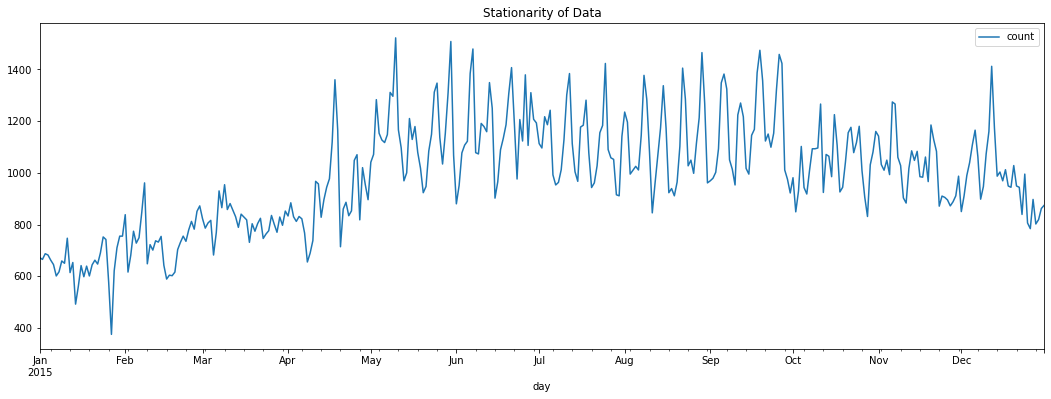

In [298]:
## plotting of the crime count against the date
TS_data.plot(title='Stationarity of Data',figsize=(18,6)).autoscale(axis='x',tight=True)

Some distinguishable patterns appear when we plot the data.

The time-series has seasonality pattern, such as Complaint count are low at the beginning of the year then its  
descring at the end of the year.

We can see here our data is Non Stationary



##  ii) Using ADF test

In [300]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(TS_data["count"])
result

(-2.140243720148307,
 0.22864319130540683,
 15,
 349,
 {'1%': -3.449226932880019,
  '5%': -2.869857365438656,
  '10%': -2.571201085130664},
 4215.816677206224)

In [304]:
timeseries= TS_data["count"]
def adf_check(time_series):
    """ 
    pass in a time series, return ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller: ')
    labels= ['ADF test statistics ','pvalue','#Lags Used',' Number of observation used']
    
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
        
    if result[1]<= 0.05:
        print('strong evidence against null hypothesis, Reject the null hypothesis. Data is stationary ')
    else:
        print('weak evidence against null hypothesis,time series is Non Stationary')
        

In [305]:
adf_check(TS_data["count"])

Augmented Dickey-Fuller: 
ADF test statistics  : -2.140243720148307
pvalue : 0.22864319130540683
#Lags Used : 15
 Number of observation used : 349
weak evidence against null hypothesis,time series is Non Stationary


# Decomposition of time series

In [311]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=12,7

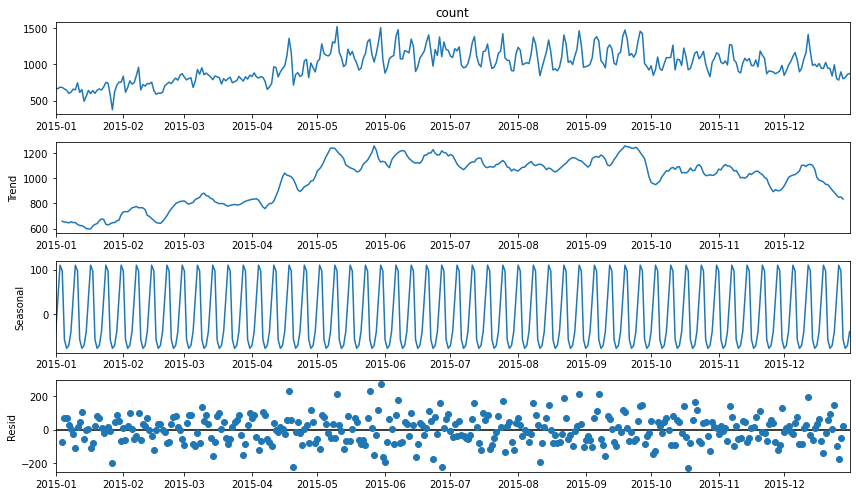

In [314]:
decomposition=seasonal_decompose(TS_data["count"],model='add')    #visualize components of time series
decomposition.plot();

# Moving average

In [315]:
TS_data['MA12']=TS_data['count'].rolling(30).mean()

<AxesSubplot:title={'center':'MA12'}, xlabel='day'>

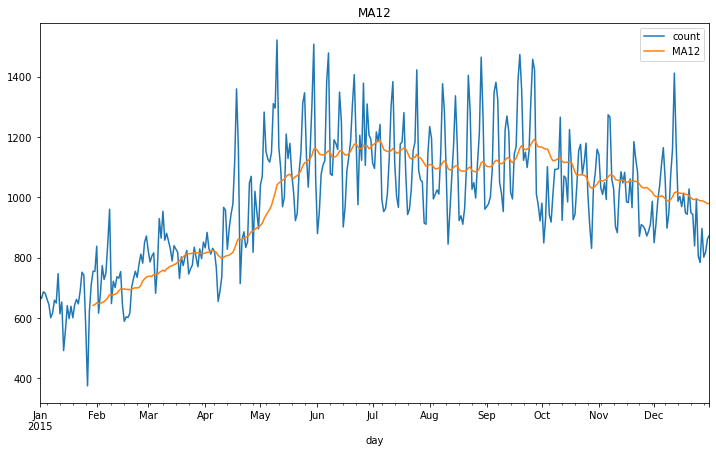

In [322]:
TS_data['count'].plot(legend=True,title='data').autoscale(axis='x',tight=True)
TS_data['MA12'].plot(legend=True,title='MA12')

In [323]:
TS_data["first_diff"]=TS_data["count"].diff(periods=2)      
TS_data.head()

,count,MA12,first_diff
day,,,
2015-01-01,672,NaN,NaN
2015-01-02,665,NaN,NaN
2015-01-03,687,NaN,15.0
2015-01-04,682,NaN,17.0
2015-01-05,662,NaN,-25.0


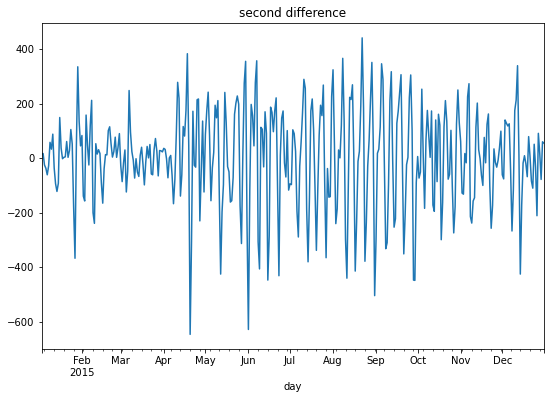

In [324]:
TS_data["first_diff"].plot(title="second difference",figsize=(9,6)).autoscale(axis='x',tight=True);

In [327]:
adf_check(TS_data["first_diff"].dropna())

Augmented Dickey-Fuller: 
ADF test statistics  : -7.1126348255825205
pvalue : 3.903151616115241e-10
#Lags Used : 17
 Number of observation used : 345
strong evidence against null hypothesis, Reject the null hypothesis. Data is stationary 


### Now data is stationary

# Holts Winters method for Forecasting

In [328]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [329]:
model = ExponentialSmoothing(TS_data['count'],trend='additive',seasonal='add',seasonal_periods=12).fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


# Next 10 predictions

In [330]:
forecast_predictions=model.forecast(10)                                          #we are forecasting complaints of 1 week of 2016
forecast_predictions

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2016-01-01    860.195160
2016-01-02    821.157297
2016-01-03    831.661268
2016-01-04    823.792896
2016-01-05    884.096174
2016-01-06    792.550277
2016-01-07    816.721627
2016-01-08    869.061908
2016-01-09    827.818153
2016-01-10    794.962083
Freq: D, dtype: float64

<AxesSubplot:xlabel='day'>

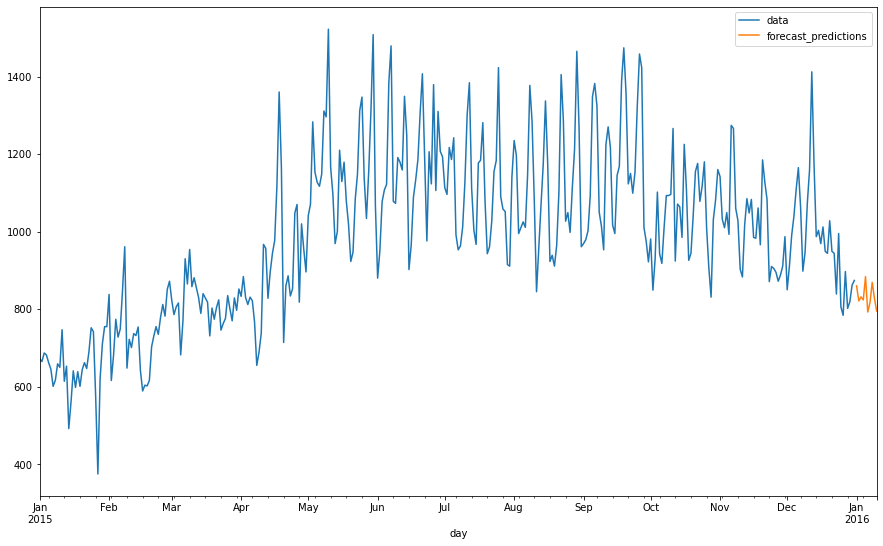

In [331]:
TS_data["count"].plot(legend=True,label="data",figsize=(15,9))
forecast_predictions.plot(legend=True,label="forecast_predictions")

# ACF and PACF plot

In [332]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

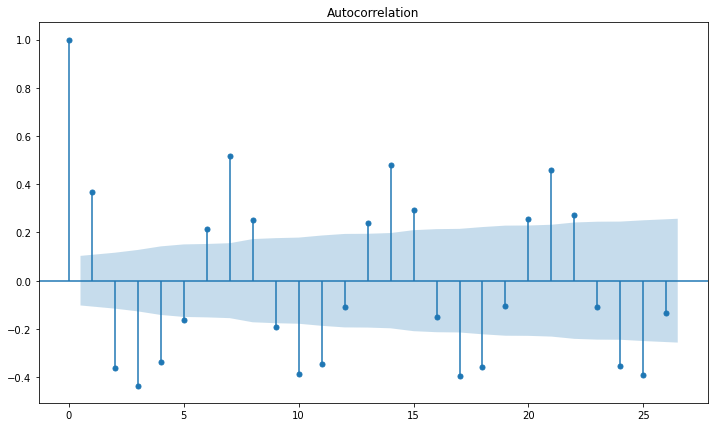

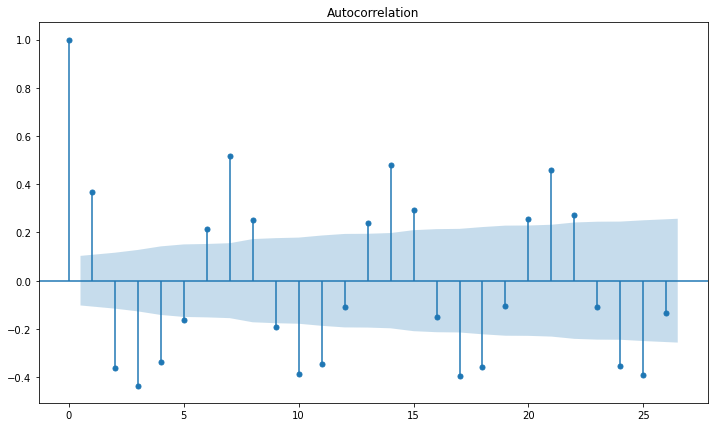

In [373]:
plot_acf(TS_data['first_diff'].dropna())

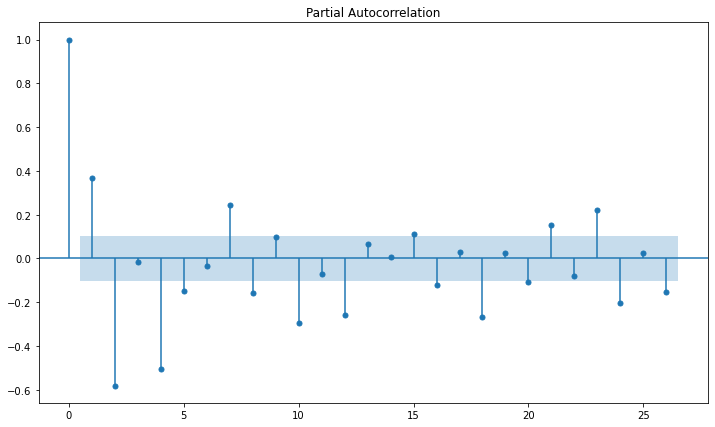

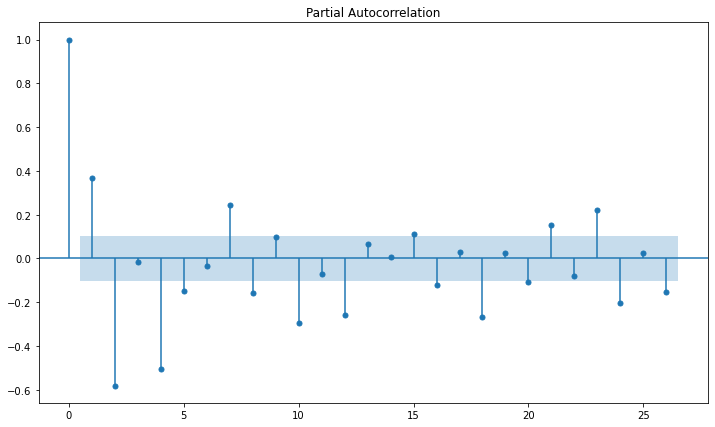

In [374]:
plot_pacf(TS_data['first_diff'].dropna())

# Auto ARIMA and SERIMAX

In [361]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [359]:
stepwise_fit = auto_arima(TS_data['first_diff'].dropna(), start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

C:\Users\DELL\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4797.507, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4746.627, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4602.350, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4574.524, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4576.388, Time=1.15 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 4.883 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2283.262
Date:                Fri, 16 Sep 2022   AIC                           4574.524
Time:                        11:44:20   BIC                           4590.102
Sample:                             0   HQIC                          4580.716
                                - 363                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9880      0.046     21.419      0.000       0.898       1.078
ar.L2         -0.6746      0.037    -18.222      0.000      -0.747      -0.602
ma.L1         -0.6997      0.046    -15.353      0.000      -0.789      -0.610
sigma2      1.695e+04   1227.879     13.806      0.000    1.45e+04    1.94e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.08   Prob(JB):                         0.77
Heteroskedasticity (H):               1.27   Skew:                            -0.06
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Split the data into train/test sets

In [360]:
train_data=TS_data['first_diff'].dropna().iloc[:335]
test_data=TS_data['first_diff'].dropna().iloc[335:]

In [362]:
model = ARIMA(train_data,order=(2,0,1))
results = model.fit()
results.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             first_diff   No. Observations:                  335
Model:                     ARMA(2, 1)   Log Likelihood               -2108.243
Method:                       css-mle   S.D. of innovations            130.586
Date:                Fri, 16 Sep 2022   AIC                           4226.487
Time:                        11:52:45   BIC                           4245.557
Sample:                    01-03-2015   HQIC                          4234.090
                         - 12-03-2015                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7069      2.768      0.617      0.538      -3.719       7.133
ar.L1.first_diff     1.0051      0.051     19.563      0.000       0.904       1.106
ar.L2.first_diff    -0.6768      0.041    -16.661      0.000      -0.756      -0.597
ma.L1.first_diff    -0.7421      0.068    -10.899      0.000      -0.876      -0.609
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7426           -0.9624j            1.2156           -0.1454
AR.2            0.7426           +0.9624j            1.2156            0.1454
MA.1            1.3476           +0.0000j            1.3476            0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [363]:
model1=SARIMAX(train_data,order=(2,0,1),seasonal_order=(1,0,0,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [364]:
fit_model=model1.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          first_diff   No. Observations:                  335
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood               -2106.767
Date:                             Fri, 16 Sep 2022   AIC                           4223.535
Time:                                     11:54:24   BIC                           4242.605
Sample:                                 01-03-2015   HQIC                          4231.137
                                      - 12-03-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0057      0.046     21.861      0.000       0.915       1.096
ar.L2         -0.6749      0.039    -17.212      0.000      -0.752      -0.598
ma.L1         -0.7436      0.041    -18.198      0.000      -0.824      -0.664
ar.S.L12      -0.0989      0.056     -1.758      0.079      -0.209       0.011
sigma2       1.69e+04   1248.468     13.534      0.000    1.45e+04    1.93e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.36   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.07   Prob(JB):                         0.45
Heteroskedasticity (H):               1.50   Skew:                            -0.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 1 month predictions

In [367]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions=fit_model.predict(start=start,end=end,dynamic=False,typ='levels').rename('SARIMAX(2,0,1)&(1, 0, [], 12) preictions')

In [368]:
#compare predictions v/s expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data[i]}")

predicted=88.26353977, expected=128.0
predicted=-1.267210739, expected=118.0
predicted=-62.48924043, expected=126.0
predicted=-65.40248938, expected=-46.0
predicted=-7.178700097, expected=-267.0
predicted=36.42488143, expected=-115.0
predicted=39.88688401, expected=175.0
predicted=13.17697078, expected=213.0
predicted=-19.11588095, expected=339.0
predicted=-14.83745433, expected=14.0
predicted=-7.17992963, expected=-425.0
predicted=-14.54456528, expected=-171.0
predicted=0.4902421212, expected=-18.0
predicted=9.86831479 , expected=9.0
predicted=9.755801816, expected=-20.0
predicted=3.488417136, expected=-68.0
predicted=-4.700532742, expected=79.0
predicted=-7.032292357, expected=5.0
predicted=-3.742325075, expected=-84.0
predicted=1.215418375, expected=-110.0
predicted=4.286917544, expected=51.0
predicted=2.177051789, expected=-33.0
predicted=-0.1934838595, expected=-211.0
predicted=0.05132991721, expected=91.0
predicted=-0.8339056953, expected=18.0
predicted=-0.829612829, expected=-78

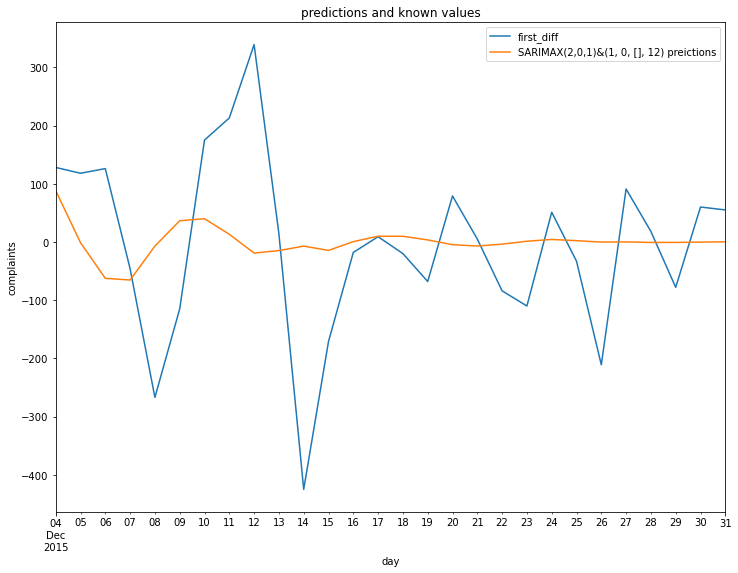

In [369]:
plt.title("predictions and known values")
plt.xlabel("time period")
plt.ylabel("complaints")
ax=test_data.plot(legend=True,figsize=(12,9))
predictions.plot(legend=True)
plt.show()

# Evaluation of the model¶

In [370]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_data, predictions)
print('MSE error',error)

MSE error 22494.059824517994


In [371]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data, predictions)
print(f'SARIMAX(4,1,3)&(1, 0, [], 12) preictions RMS Error: {error:11.10}')

SARIMAX(4,1,3)&(1, 0, [], 12) preictions RMS Error: 149.9801981


######################################################## Thank you ####################################################